**Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.**


PROBLEM STATEMEN

* Blossom Bank wants to build a Machine Learning model to predict online payment fraud
* The data set contains fraudulent transactions.





OBJECTIVE

* Improve the financial fraud detection system by building a machine learning model and identifying the best machine learning model to predict online payment fraud.


**Below are the columns reference:**

* step: represents a unit of time where 1 step equals 1
hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient
before the transaction
* newbalanceDest: the new balance of the
recipient after the transaction
* isFraud: fraud transaction

In [2]:
#Import neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
#Load dataset
Data = pd.read_csv("Online Payment Fraud Detection.csv")

# Data Inspection

In [69]:
#View fisrt 5 rows
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [70]:
# View last 5 rows
Data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [71]:
# Shape of the data
Data.shape

(1048575, 10)

In [72]:
# Check data columns
Data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [73]:
# Check missing value
Data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [74]:
# Check data details
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [75]:
# check summary statistics of numeric columns
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


## Data Visualization

**Univariate Analysis**

Exploring variables one by one. From the word "UNI" which single/one. Univariate analysis will depend on whether the variable is categorical or numerical/continuous

Cash out and Payment are the most common type of transactions but Transfer type has the maximum amount of money being transfered to the recipient.

<AxesSubplot:title={'center':'Counts of each class'}, ylabel='isFraud'>

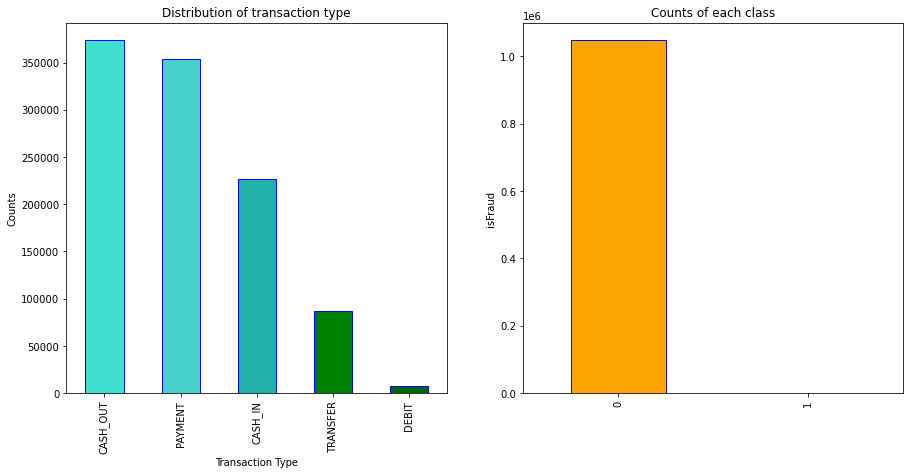

In [76]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.xlabel("Transaction Type")
plt.ylabel("Counts")

# What type of transaction was used the most?
Data["type"].value_counts().plot.bar(title="Distribution of transaction type", color=["turquoise", "mediumturquoise", "lightseagreen", "green", "darkgreen"], edgecolor="Blue")

plt.subplot(2,2,2)
plt.ylabel("isFraud")
Data["isFraud"].value_counts().plot.bar(title="Counts of each class", color=["orange", "wheat"], edgecolor="Blue")


The above graph indicates that the dataset is highly unbalanced.

NameError: name 'Data' is not defined

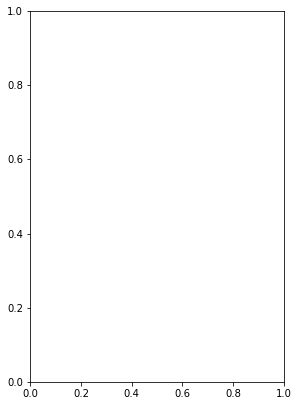

In [3]:
plt.figure(figsize=(10,15))

plt.subplot(2,2,1)
plt.hist(Data.amount, rwidth=0.7)
plt.title("Amount")

plt.subplot(2,2,2)
plt.hist(Data.isFraud, rwidth=0.7)
plt.title("isFraud")


plt.subplot(2,2,3)
plt.hist(Data.newbalanceOrig, rwidth=0.7)
plt.title("newbalanceOrig")

plt.subplot(2,2,4)
plt.hist(Data.newbalanceDest, rwidth=0.7)
plt.title("newbalanceDest")


Text(0.5, 1.0, 'Step')

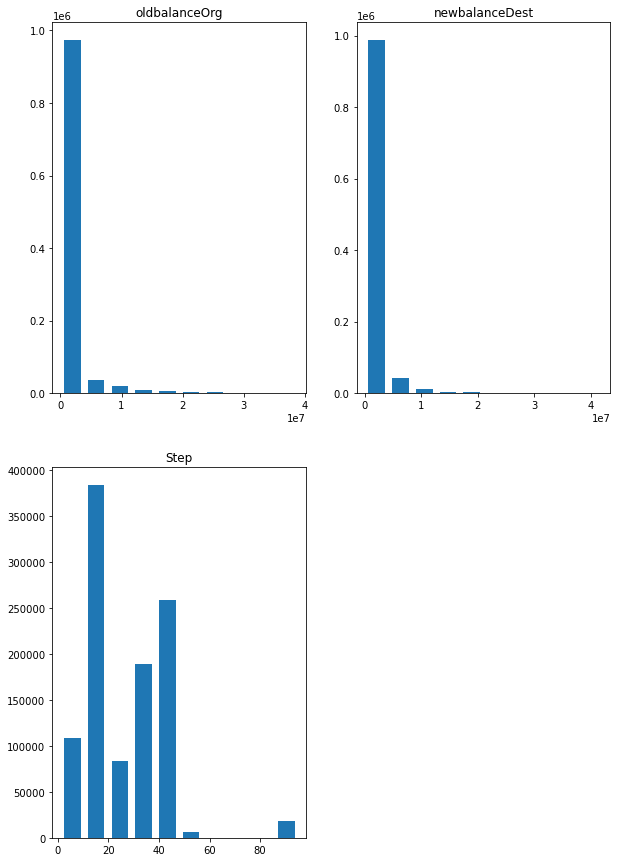

In [78]:
plt.figure(figsize=(10,15))

plt.subplot(2,2,1)
plt.hist(Data.oldbalanceOrg, rwidth=0.7)
plt.title("oldbalanceOrg")

plt.subplot(2,2,2)
plt.hist(Data.oldbalanceDest, rwidth=0.7)
plt.title("newbalanceDest")


plt.subplot(2,2,3)
plt.hist(Data.step, rwidth=0.7)
plt.title("Step")


<AxesSubplot:xlabel='step', ylabel='Count'>

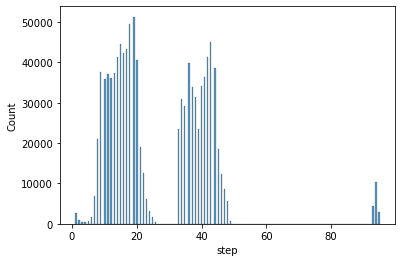

In [79]:
# Distribution of the step feature- I observed i dont have a normal distribution
sns.histplot(data=Data, x="step")

<AxesSubplot:xlabel='amount', ylabel='Count'>

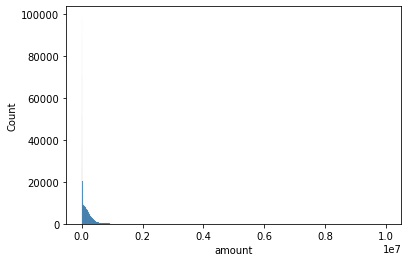

In [80]:
# The distribution of the amount feature is not symentrical
sns.histplot(data=Data, x="amount")

<AxesSubplot:xlabel='amount'>

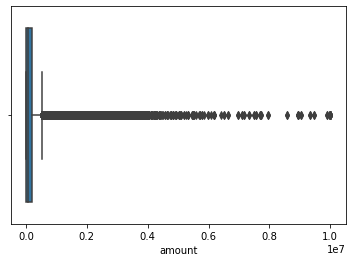

In [81]:
# The amount column has a lot outliers
sns.boxplot(data=Data, x="amount")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='step', ylabel='Density'>

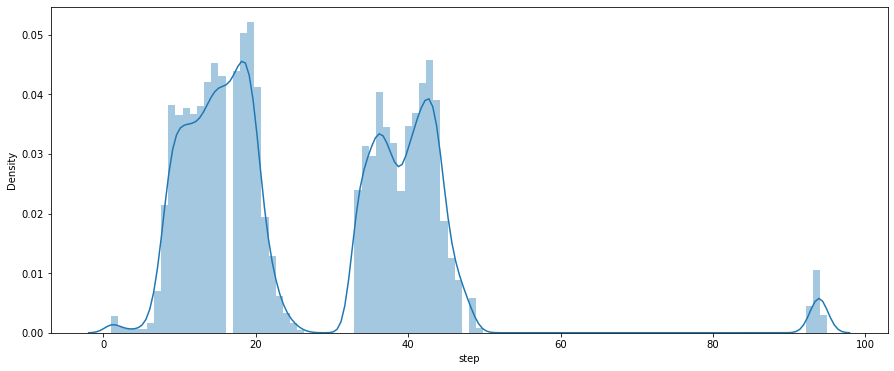

In [82]:
# Distribution of the step column
plt.figure(figsize=(15,6))
sns.distplot(Data["step"], bins=100)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='amount', ylabel='Density'>

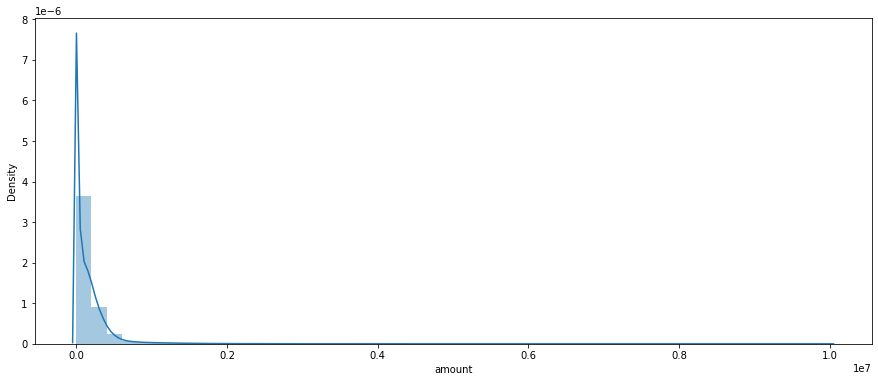

In [83]:
# Distribution of the amount column
plt.figure(figsize=(15,6))
sns.distplot(Data["amount"])

**Bi-Variate Analysis**

Comparing and analyzing two variables 

It can be either a combination of categorical vs Categorical or Numerical vs Numerical

<AxesSubplot:xlabel='type', ylabel='amount'>

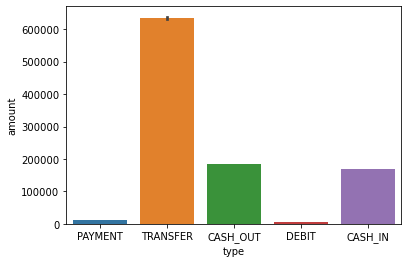

In [84]:
#Type of transaction that had the most amount in value
sns.barplot(x="type", y="amount", data=Data)

<AxesSubplot:xlabel='type', ylabel='count'>

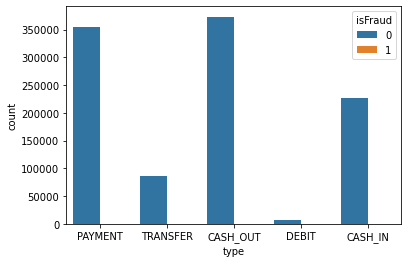

In [85]:
#Type of transaction that was used most
sns.countplot(x="type", data=Data, hue="isFraud")

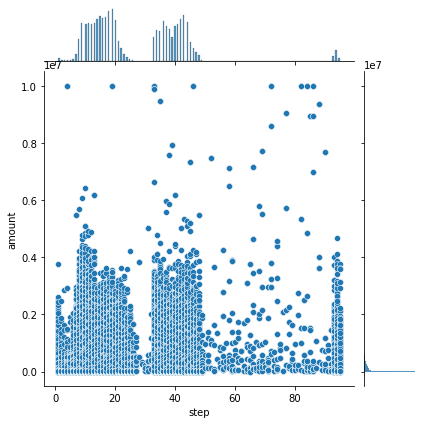

In [86]:
# A joint plot investigating the relationship between Step and amount
sns.jointplot(x="step", y="amount", data=Data)

In [87]:
corr = Data.corr()
corr['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64

In [88]:
#Correlation
Data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

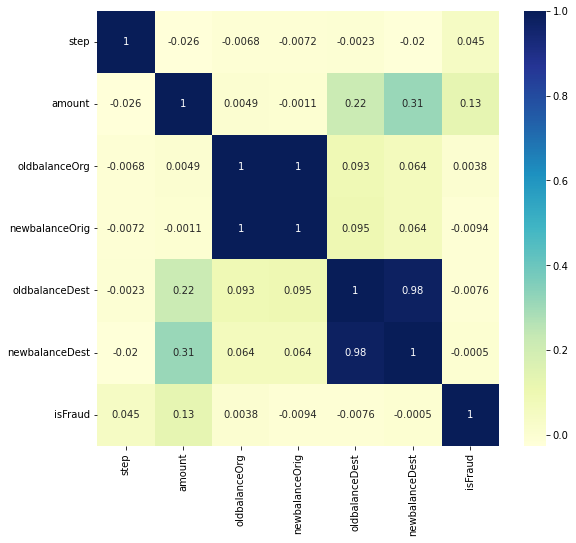

In [89]:
# Using the heatmap to showcase the relationship between each columns 
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(Data.corr(),cmap ="YlGnBu", annot=True)

In [90]:
Data["isFraud"].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

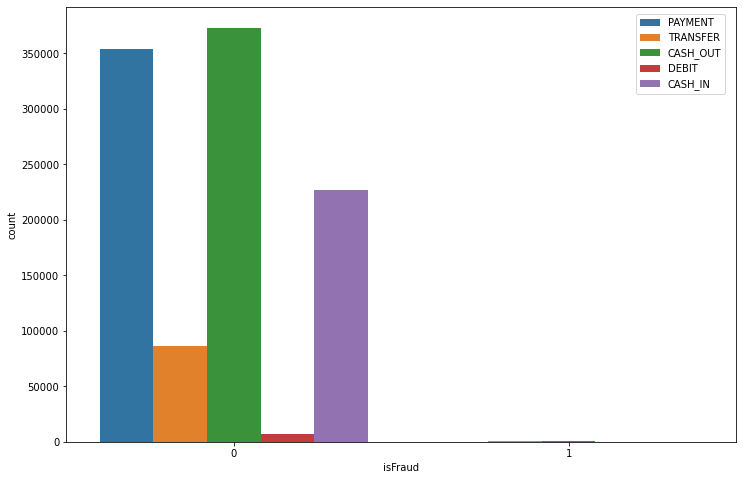

In [91]:
plt.figure(figsize=(12,8))
sns.countplot(x="isFraud", data=Data, hue="type")
plt.legend(loc=[0.85,0.8])

There are several ways to approach this classification problem taking into consideration this unbalance.

* Collect more data, nice strategy but not applicable in this case
* Changing the performance metric
* F1score (weighted average of precision recall)
* Use Kappa-which is a classification accuracy nomalized by the imbalance of the classes in the data
* ROC curves-calculates sensitivity/specificity ratio.

Resampling the dataset

* Essentially this is a method that will process the data to have an approximate 50-50 ratio.
* One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when i have little data)
* Another is UNDER-sampling, which deletes instances from the over-represented class(better when i have lot's of data)



In [92]:
#Delete unneccesary columns
Data.drop(["nameOrig", "nameDest"], axis=1, inplace=True)
Data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [93]:
Data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


## Sub-Sample

This will create a dataframe with a ratio of 50/50 ratio of fraud and non-fraud transactions. This is done to avoid OVERFITTING and WRONG CORRELATIONS 

In [95]:
from sklearn.preprocessing import StandardScaler, RobustScaler


rob_scaler = RobustScaler()

#create a new column for scaled columns
Data["Scale_step"] = rob_scaler.fit_transform(Data["step"].values.reshape(-1,1))
Data["Scale_amount"] = rob_scaler.fit_transform(Data["amount"].values.reshape(-1,1))
Data["Scale_oldbalanceOrg"] = rob_scaler.fit_transform(Data["oldbalanceOrg"].values.reshape(-1,1))
Data["Scale_newbalanceOrig"] = rob_scaler.fit_transform(Data["newbalanceOrig"].values.reshape(-1,1))
Data["Scale_oldbalanceDest"] = rob_scaler.fit_transform(Data["oldbalanceDest"].values.reshape(-1,1))
Data["Scale_oldbalanceDest"] = rob_scaler.fit_transform(Data["newbalanceDest"].values.reshape(-1,1))

Data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Scale_step,Scale_amount,Scale_oldbalanceOrg,Scale_newbalanceOrig,Scale_oldbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-0.791667,-0.329858,1.128013,0.918078,-0.189823
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-0.791667,-0.369416,0.038400,0.111024,-0.189823
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-0.791667,-0.377765,-0.115784,0.000000,-0.189823
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-0.791667,-0.377765,-0.115784,0.000000,-0.189823
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-0.791667,-0.320789,0.187000,0.171168,-0.189823


In [96]:
Data.drop(["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"], axis=1, inplace=True)
Data.head()

,type,isFraud,Scale_step,Scale_amount,Scale_oldbalanceOrg,Scale_newbalanceOrig,Scale_oldbalanceDest
0,PAYMENT,0,-0.791667,-0.329858,1.128013,0.918078,-0.189823
1,PAYMENT,0,-0.791667,-0.369416,0.038400,0.111024,-0.189823
2,TRANSFER,1,-0.791667,-0.377765,-0.115784,0.000000,-0.189823
3,CASH_OUT,1,-0.791667,-0.377765,-0.115784,0.000000,-0.189823
4,PAYMENT,0,-0.791667,-0.320789,0.187000,0.171168,-0.189823


<AxesSubplot:xlabel='Scale_amount'>

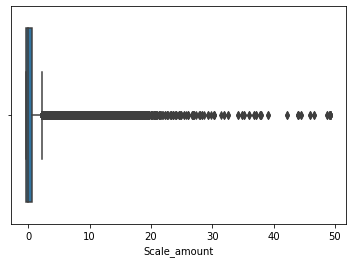

In [98]:
# The amount column has a lot outliers
sns.boxplot(data=Data, x="Scale_amount")

In [105]:
#Random Under-Sampling
#This basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting

print("Non-Fraud transactions = ", Data["isFraud"].value_counts()[0])
print("Fraud transactions = ", Data["isFraud"].value_counts()[1])
print("-------------------------")

Data=Data.sample(frac=1)

#Amount of fraud classes 492 rows.
fraud_Data = Data.loc[Data["isFraud"] == 1]
non_fraud_Data = Data.loc[Data["isFraud"] == 0][:1142]

normal_distributed_Data =pd.concat([fraud_Data, non_fraud_Data])

#Shuffle dataframe rows
new_Data = normal_distributed_Data.sample(frac=1, random_state=42)

new_Data.head()

print("Result from random undersampling")
print("Non-Fraud transactions = ", new_Data["isFraud"].value_counts()[0])
print("Fraud transactions = ", new_Data["isFraud"].value_counts()[1])

Non-Fraud transactions =  1047433
Fraud transactions =  1142
-------------------------
Result from random undersampling
Non-Fraud transactions =  1142
Fraud transactions =  1142


#### Data Inspection after random undersampling

In [100]:
new_Data.head()

,type,isFraud,Scale_step,Scale_amount,Scale_oldbalanceOrg,Scale_newbalanceOrig,Scale_oldbalanceDest
729661,CASH_OUT,1,0.708333,2.120152,3.569848,0.0,9.029111
884860,TRANSFER,0,0.916667,2.857294,-0.044049,0.0,0.542631
940748,CASH_OUT,0,0.958333,0.033332,-0.117109,0.0,0.134141
66780,CASH_OUT,0,-0.458333,0.594766,0.622400,0.0,-0.189823
178668,CASH_OUT,1,-0.333333,0.722699,-0.117109,0.0,0.005886


In [101]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 729661 to 397547
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  2284 non-null   object 
 1   isFraud               2284 non-null   int64  
 2   Scale_step            2284 non-null   float64
 3   Scale_amount          2284 non-null   float64
 4   Scale_oldbalanceOrg   2284 non-null   float64
 5   Scale_newbalanceOrig  2284 non-null   float64
 6   Scale_oldbalanceDest  2284 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 142.8+ KB


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



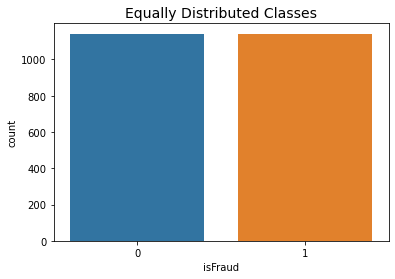

In [103]:
sns.countplot("isFraud", data=new_Data)
plt.title("Equally Distributed Classes", fontsize=14)
plt.show()

### Feature Engineering

In [106]:
# Convert categorical column into numerical (type)
from sklearn.preprocessing import LabelEncoder
new_Data["type"] = new_Data["type"].map({"CASH_OUT":1, "PAYMENT":2, "CASH_IN":3, "TRANSFER":4, "DEBIT":5})
new_Data.head()

,type,isFraud,Scale_step,Scale_amount,Scale_oldbalanceOrg,Scale_newbalanceOrig,Scale_oldbalanceDest
1030456,1,1,1.916667,2.340757,3.895346,0.000000,0.287013
334315,2,0,-0.166667,-0.260384,-0.117109,0.000000,-0.189823
677324,2,0,0.666667,-0.172370,0.223991,0.028735,-0.189823
732916,2,0,0.708333,-0.329977,-0.117109,0.000000,-0.189823
343301,1,1,-0.166667,-0.224536,0.110303,0.000000,-0.162798


In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
# import xgboost as xgb
# from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold


In [119]:
# Machine learning algorithms will be apply to the dataset
classifiers = [[RandomForestClassifier(), "Random Forest"],
               [KNeighborsClassifier(), "K-Nearest Neighbors"],
               [SGDClassifier(), "SGD Classifier"],
               [SVC(), "SVC"],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state = 42), "Decision Tree"],
               [LogisticRegression(), "Logistic Regression"]
              ]
               
    


## Select Target

The target is what i want to predict. In this project i want to predict isFraud.

I tend to name my target `y`

In [127]:
label = new_Data["isFraud"]


## Select Features

Features is the necessary columns that i created from my existing features, after
insights from my EDA

I tend to call the training data `X`

In [128]:
Data_1 = new_Data.drop("isFraud", axis=1)


## Model Selection, Training, and Validation


**Train Test Split**

In [129]:
X_train,X_test,y_train,y_test=train_test_split(Data_1, label, test_size=0.3)

In [131]:
score_list = {}
cross_val_list = {}
roc_auc_list = {}
accuracy_score_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_test, y_test).mean()
    roc_auc = roc_auc_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    
    score_list[model_name] = ([str(round(score*100, 2)) + '%'])
    cross_val_list[model_name] = ([str(round(cross_val*100, 2)) + '%'])
    roc_auc_list[model_name] = ([str(round(roc_auc*100, 2)) + '%'])
    accuracy_score_list[model_name] = ([str(round(accuracy*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [132]:
print("Accuracy Score")
sl = pd.DataFrame(score_list)
sl.head()

Accuracy Score


,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,97.38%,94.61%,91.11%,82.51%,80.32%,96.21%,90.67%


In [133]:
print("Cross Validation")
sl = pd.DataFrame(cross_val_list)
sl.head()

Cross Validation


,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,96.94%,93.3%,88.05%,76.82%,69.24%,93.73%,89.36%


In [136]:
print("roc_auc_list")
sl = pd.DataFrame(roc_auc_list)
sl.head()

roc_auc_list


,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,97.38%,94.61%,91.11%,82.51%,80.32%,96.21%,90.67%


**Logistic Regression**

In [137]:
LR_model = LogisticRegression(random_state=20)

In [138]:
LR_model.fit(X_train,y_train) 

LogisticRegression(random_state=20)

In [139]:
LR_pred = LR_model.predict(X_test)

In [140]:
print(accuracy_score(LR_pred,y_test))

0.9067055393586005


In [141]:
print(classification_report(LR_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       375
           1       0.86      0.95      0.90       311

    accuracy                           0.91       686
   macro avg       0.91      0.91      0.91       686
weighted avg       0.91      0.91      0.91       686



In [142]:
print(confusion_matrix(LR_pred,y_test))

[[327  48]
 [ 16 295]]


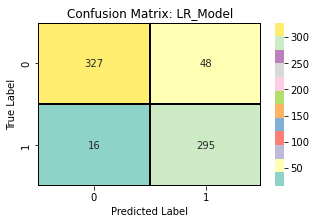

In [170]:
CM = confusion_matrix(LR_pred, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='Set3',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: LR_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Random Forest**

In [144]:
RF_model = RandomForestClassifier()

In [145]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
RF_pred = RF_model.predict(X_test)

In [148]:
print(accuracy_score(RF_pred, y_test))

0.9766763848396501


In [158]:
print(classification_report(RF_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       345
           1       0.97      0.98      0.98       341

    accuracy                           0.98       686
   macro avg       0.98      0.98      0.98       686
weighted avg       0.98      0.98      0.98       686



In [159]:
print(confusion_matrix(RF_pred,y_test))

[[336   9]
 [  7 334]]


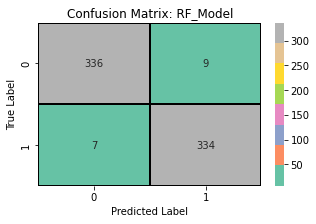

In [160]:
CM = confusion_matrix(RF_pred, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='Set2',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: RF_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Decision Tree**

In [162]:
DC_model = DecisionTreeClassifier(random_state = 42)

In [163]:
DC_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [164]:
DC_pred = DC_model.predict(X_test)

In [165]:
print(accuracy_score(DC_pred, y_test))

0.9620991253644315


In [166]:
print(classification_report(DC_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       347
           1       0.96      0.97      0.96       339

    accuracy                           0.96       686
   macro avg       0.96      0.96      0.96       686
weighted avg       0.96      0.96      0.96       686



In [168]:
print(confusion_matrix(DC_pred, y_test))

[[332  15]
 [ 11 328]]


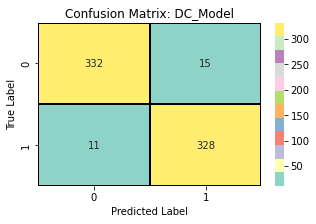

In [169]:
CM = confusion_matrix(DC_pred, y_test)
plt.figure(figsize=(5, 3))
sns.heatmap(CM,
cmap='Set3',
linecolor='black',
linewidths=1.5,
annot=True,
fmt='d')
plt.title('Confusion Matrix: DC_Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Note: One of the important points of doing this project is to identify two things.
 * Which matrix should be looking at? 
 * Which model do they work perfectly for the problem?
    
In this case, I want the higher recall because it actually covers the highest number of fraud cases. So Random Forest is the best model that fits this problem.
